# Word Frequency and Word Cloud

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

## Load Book Descriptions

In [3]:
df = pd.read_csv('data/tosho_processed_clean.csv.bz2', sep='\t', compression='bz2')
df.shape

(891, 3)

In [4]:
df.head(3)

,id,title,description_token
0,3901637,土のコレクション,土 なんて どれ も 同じ じゃ の 茶色 や の 土 しか 見 こと ない よ だれ も ...
1,3901633,わたしの,幼い 子ども たち が これ は 誰 の 物 と 意識 する よう に なる の は 2 歳...
2,3901632,なーらんだ,- ち ゅんちゅんとりさん ぶ ー ぶ ー くるま バラバラ に 散らばっ て い もの が...


## Word Length

In [5]:
df['word_length'] = df.apply(lambda x: len(x.description_token.split(" ")), axis=1)

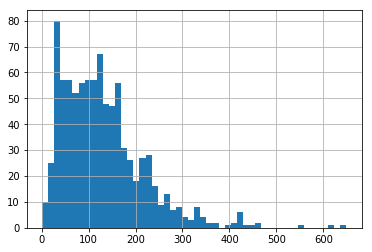

In [6]:
df['word_length'].hist(bins=50);

In [7]:
df['word_length'].describe()

count    891.000000
mean     130.135802
std       87.395219
min        1.000000
25%       64.000000
50%      117.000000
75%      169.000000
max      649.000000
Name: word_length, dtype: float64

## Word Frequency

In [8]:
hiragana_one_word_list = [chr(i) for i in range(12353, 12436)]
hiragana_one_word_list[:3]

['ぁ', 'あ', 'ぃ']

In [9]:
doc_list = [i.split(" ") for i in df['description_token'].tolist()]

### Extract each word except one-word Hiragana

In [10]:
words = [item for sublist in doc_list for item in sublist if item not in hiragana_one_word_list]

### Top 100 most common words

In [11]:
word_freq = Counter(words)
word_freq.most_common(100)

[('から', 679),
 ('いる', 563),
 ('こと', 556),
 ('年', 555),
 ('する', 530),
 ('たち', 459),
 ('人', 457),
 ('この', 401),
 ('絵本', 355),
 ('著者', 355),
 ('本', 355),
 ('もの', 345),
 ('ある', 327),
 ('第', 325),
 ('など', 310),
 ('賞', 292),
 ('なっ', 290),
 ('その', 284),
 ('子ども', 271),
 ('界', 250),
 ('日本', 235),
 ('よう', 231),
 ('紹介', 225),
 ('より', 221),
 ('日', 220),
 ('1', 208),
 ('という', 204),
 ('として', 204),
 ('なる', 201),
 ('心', 200),
 ('大', 187),
 ('家', 186),
 ('受賞', 185),
 ('者', 184),
 ('ため', 182),
 ('話', 180),
 ('情報', 178),
 ('さん', 176),
 ('られ', 170),
 ('児童', 169),
 ('まで', 166),
 ('的', 160),
 ('でも', 158),
 ('生まれ', 157),
 ('刊行', 156),
 ('れる', 155),
 ('掲載', 155),
 ('シリーズ', 152),
 ('データ', 147),
 ('書籍', 147),
 ('当時', 146),
 ('略歴', 140),
 ('そして', 140),
 ('力', 135),
 ('物語', 130),
 ('作', 130),
 ('なり', 126),
 ('あり', 125),
 ('3', 124),
 ('研究', 123),
 ('作家', 123),
 ('2', 122),
 ('件', 122),
 ('方', 121),
 ('時代', 120),
 ('いく', 119),
 ('歳', 118),
 ('絵', 118),
 ('ない', 117),
 ('たり', 109),
 ('とき', 109),
 ('みんな', 108),
 ('県'

## Word Cloud

In [12]:
# !apt-get -y install fonts-ipafont-gothic

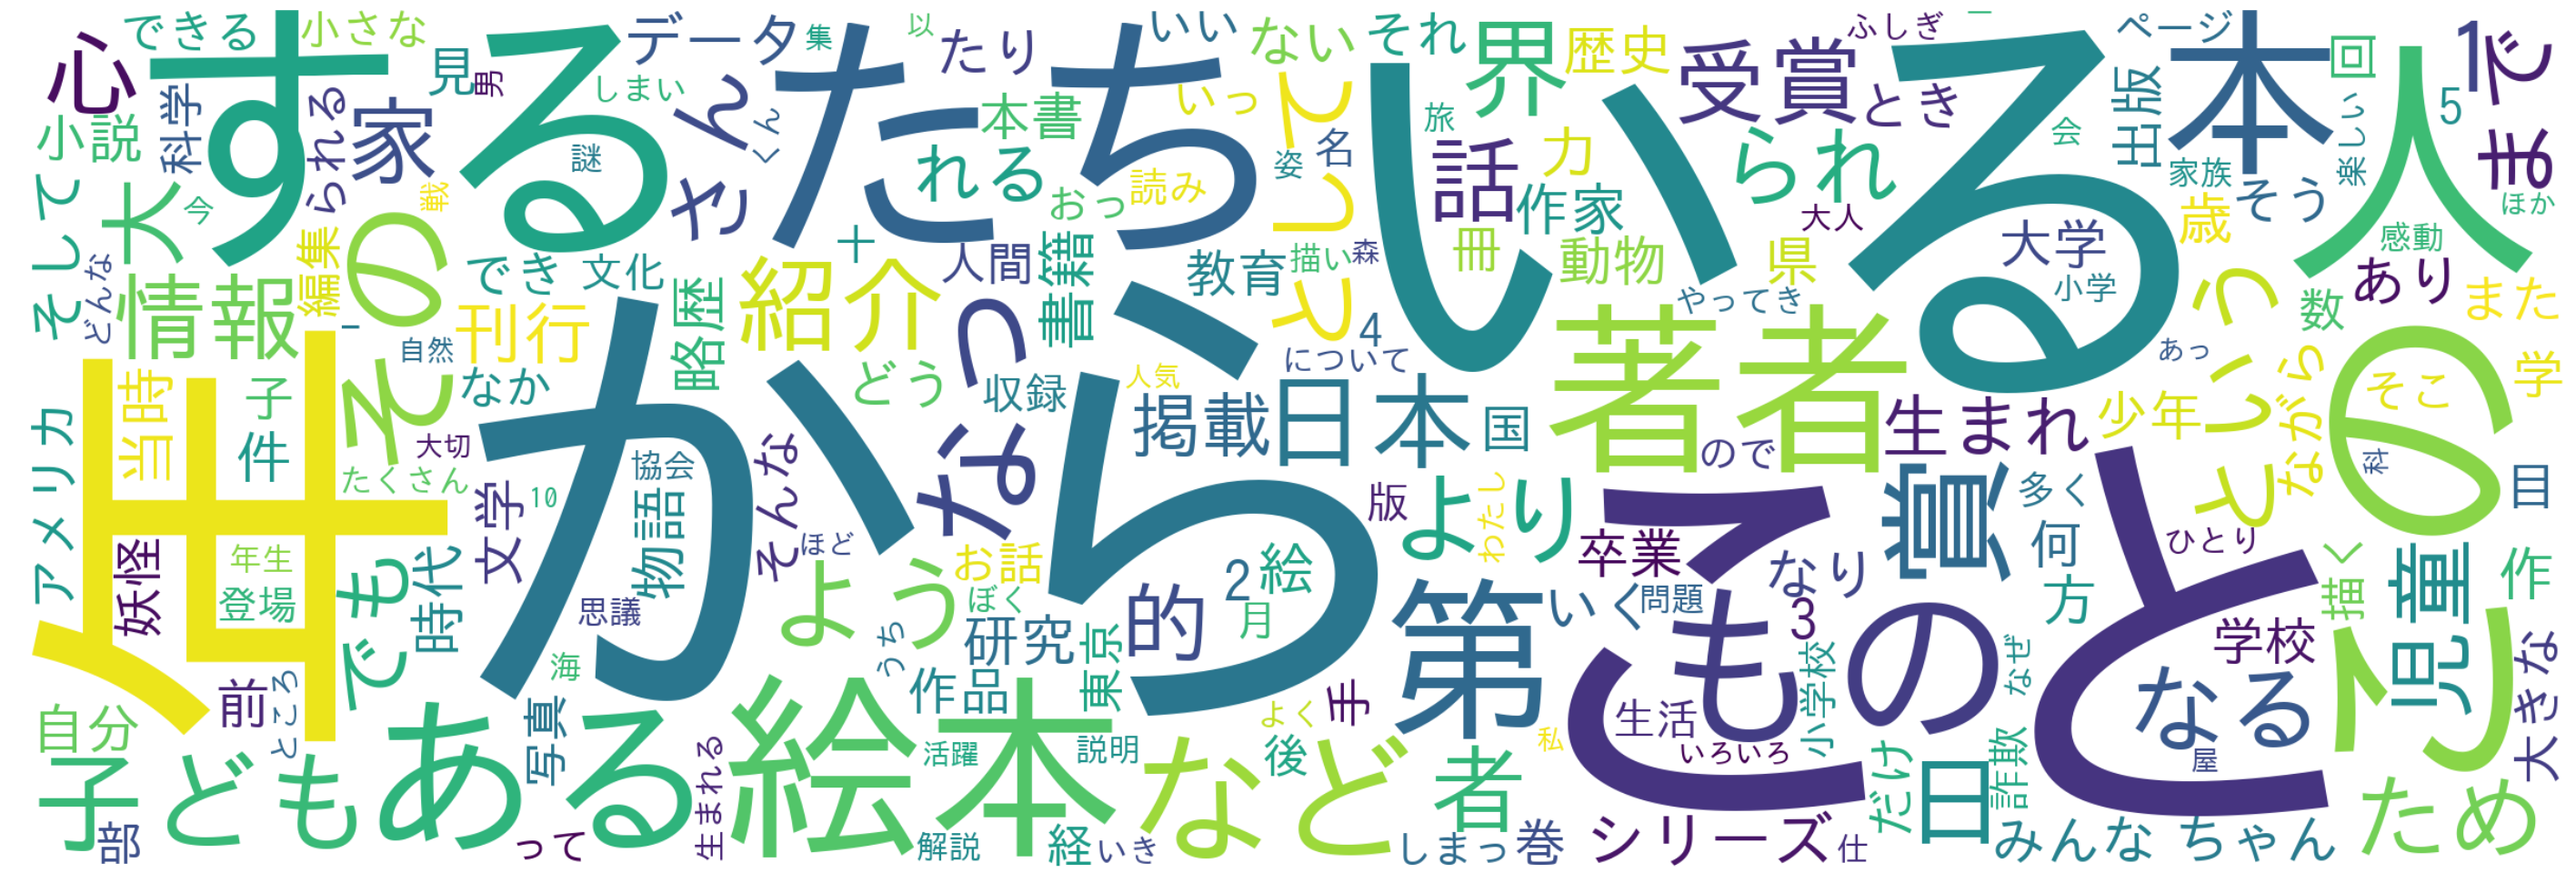

In [13]:
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', max_words=200, background_color="white", width=2400, height=815).generate_from_frequencies(word_freq)

plt.figure(figsize=(50,30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();